In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split

In [2]:
data_dir = (r'Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/')
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

In [3]:
img_size = 128
image_array = cv2.resize(img_array, (img_size,img_size))

In [4]:
gt1 = cv2.imread('Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor/gg (1).jpg')
mt1 = cv2.imread('Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor/m (10).jpg')
nt1 = cv2.imread('Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/no_tumor/1.jpg')
pt1 = cv2.imread('Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor/p (151).jpg')

(-0.5, 511.5, 511.5, -0.5)

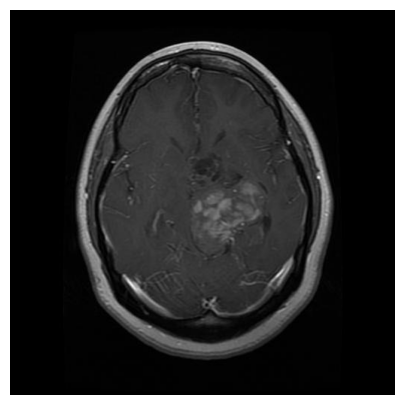

In [5]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(gt1)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

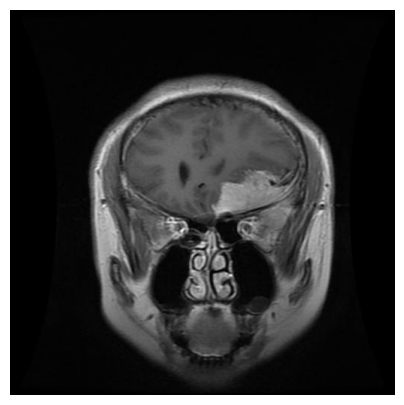

In [6]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(mt1)
plt.axis('off')

(-0.5, 349.5, 349.5, -0.5)

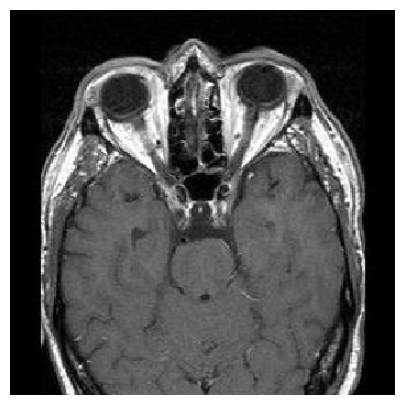

In [7]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(nt1)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

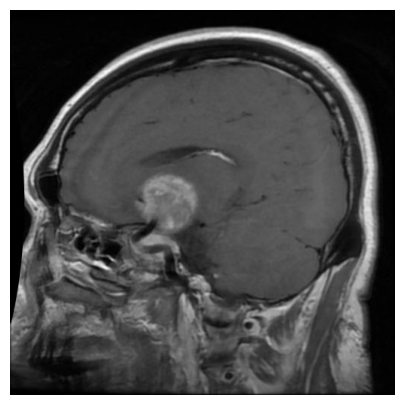

In [8]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(pt1)
plt.axis('off')

In [9]:
train_data = []

for i in categories:
    train_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_data.append([new_image_array , tag])
        except Exception as e:
            pass

In [10]:
X = []
y = []
for i,j in train_data:
    X.append(i)
    y.append(j)
X = np.array(X).reshape(-1,img_size,img_size)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,128,128,1)

(2870, 128, 128)


In [11]:
from keras.utils.np_utils import to_categorical   

y_enc = to_categorical(y, num_classes = 4)

In [12]:
X_train , X_test, y_train, y_test = train_test_split(X , y_enc , test_size = 0.1, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train , y_train , test_size = 0.1, random_state = 42)

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

model = Sequential()

In [14]:
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())


model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation = "softmax"))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 20

es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience = 3
)

batch_size = 16
imggen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)

In [15]:
imggen.fit(X_train)
history = model.fit(imggen.flow(X_train,y_train,batch_size = batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              callbacks = [es])    

Epoch 1/20
145/145 [==============================] - 9s 31ms/step - loss: 1.2266 - accuracy: 0.4372 - val_loss: 1.1600 - val_accuracy: 0.4710
Epoch 2/20
145/145 [==============================] - 3s 21ms/step - loss: 0.9064 - accuracy: 0.5888 - val_loss: 0.9029 - val_accuracy: 0.5444
Epoch 3/20
145/145 [==============================] - 3s 21ms/step - loss: 0.7653 - accuracy: 0.6690 - val_loss: 0.8205 - val_accuracy: 0.6332
Epoch 4/20
145/145 [==============================] - 3s 21ms/step - loss: 0.6466 - accuracy: 0.7175 - val_loss: 0.7419 - val_accuracy: 0.6602
Epoch 5/20
145/145 [==============================] - 3s 21ms/step - loss: 0.6136 - accuracy: 0.7353 - val_loss: 0.6286 - val_accuracy: 0.7645
Epoch 6/20
145/145 [==============================] - 3s 21ms/step - loss: 0.5532 - accuracy: 0.7673 - val_loss: 0.6045 - val_accuracy: 0.7683
Epoch 7/20
145/145 [==============================] - 3s 21ms/step - loss: 0.4916 - accuracy: 0.7925 - val_loss: 0.7162 - val_accuracy: 0.7336

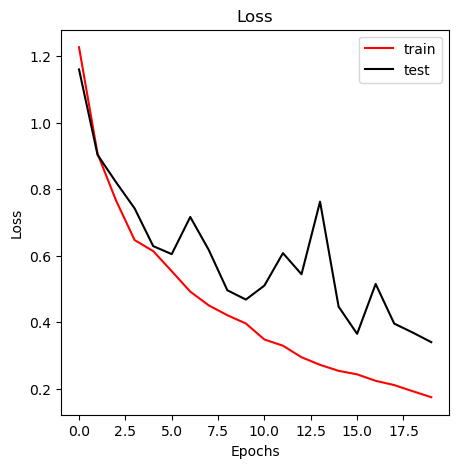

In [16]:
plt.plot(history.history["loss"],c = "red")
plt.plot(history.history["val_loss"],c = "black")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

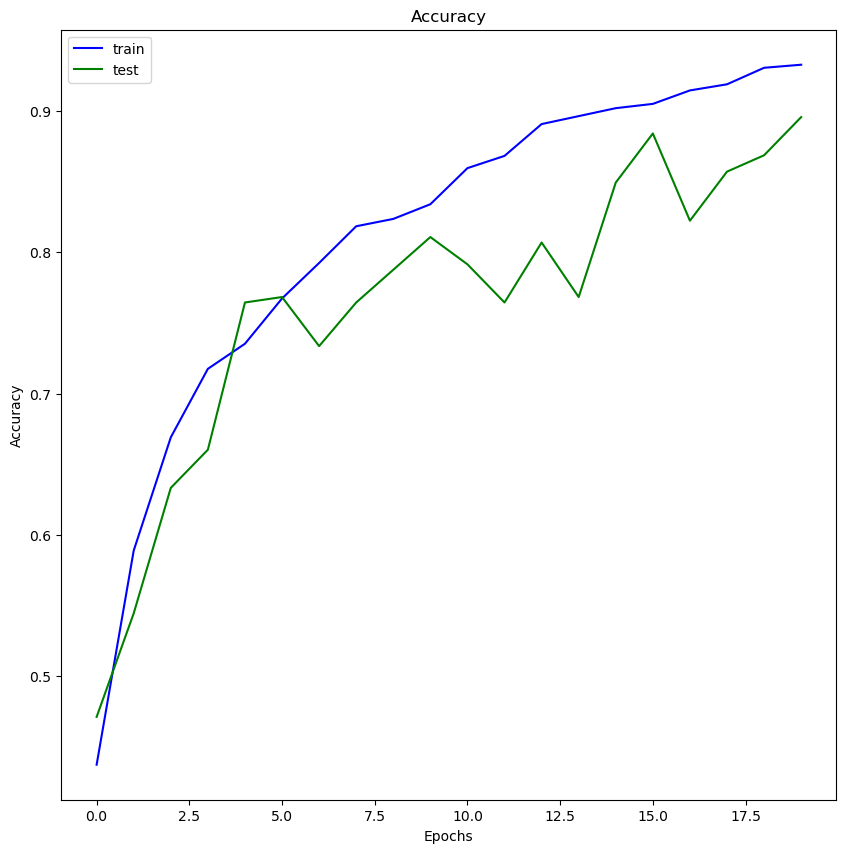

In [17]:
plt.plot(history.history["accuracy"],c = "blue")
plt.plot(history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (50,50)
plt.legend(["train", "test"])

In [18]:
score = model.evaluate(X_test, y_test, verbose = 0)
score[1]

0.8850173950195312